<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/capstone-1/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Auto-save / Auto-reload
%autosave 1

%load_ext autoreload
%autoreload 2

Autosaving every 1 seconds


# Environment set-up and data import

## PIP

In [ ]:
!pip install writefile

In [ ]:
!pip install bentoml

In [104]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [3]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for writefile: filename=writefile-0.2-py3-none-any.whl size=2903 sha256=92daa2b2f678b6248d43efba0f8e1b811c691d00cbd28bde09267d06026582da
  Stored in directory: /root/.cache/pip/wheels/f4/f6/99/56d389fac4665e36ee74470f9127213f6298c17edace78f694
Successfully built writefile


### Dataprep

In [6]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.6 MB/s 
     |████████████████████████████████| 1.1 MB 22.3 MB/s 
     |████████████████████████████████| 764 kB 45.5 MB/s 
     |████████████████████████████████| 101 kB 3.2 MB/s 
     |████████████████████████████████| 1.3 MB 5.5 MB/s 
     |████████████████████████████████| 33.8 MB 3.2 MB/s 
     |████████████████████████████████| 1.0 MB 37.8 MB/s 
     |████████████████████████████████| 2.2 MB 35.1 MB/s 
     |████████████████████████████████| 133 kB 52.3 MB/s 
     |████████████████████████████████| 1.0 MB 53.3 MB/s 
     |████████████████████████████████| 96 kB 6.1 MB/s 
     |████████████████████████████████| 232 kB 69.9 MB/s 
     |████████████████████████████████| 1.6 MB 61.5 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 54.4 MB/s 
  Created wheel for metaphone: filenam

## Envrionment

In [105]:
import numpy as np
import pandas as pd
from dataprep.eda import create_report, plot, plot_correlation
import sys

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt # https://scikit-plot.readthedocs.io/en/stable/Quickstart.htm
from IPython.display import display

# models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import ComplementNB

# tuning and metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mutual_info_score


In [8]:
sys.setrecursionlimit(15000)

In [9]:
data1 = "https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-1.csv"

In [10]:
data2 = "https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-2.csv"

In [11]:
!wget $data1 -O lendingclub-1.csv

--2022-12-19 15:08:59--  https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13161065 (13M) [text/plain]
Saving to: ‘lendingclub-1.csv’

lendingclub-1.csv   100%[===================>]  12.55M  --.-KB/s    in 0.1s    

2022-12-19 15:08:59 (112 MB/s) - ‘lendingclub-1.csv’ saved [13161065/13161065]



In [12]:
!!wget $data2 -O lendingclub-2.csv

['--2022-12-19 15:09:00--  https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-2.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 15921810 (15M) [text/plain]',
 'Saving to: ‘lendingclub-2.csv’',
 '',
 '',
 'lendingclub-2.csv     0%[                    ]       0  --.-KB/s               ',
 'lendingclub-2.csv   100%[===================>]  15.18M  --.-KB/s    in 0.09s   ',
 '',
 '2022-12-19 15:09:01 (170 MB/s) - ‘lendingclub-2.csv’ saved [15921810/15921810]',
 '']

In [13]:
part1 = pd.read_csv("lendingclub-1.csv")

In [14]:
part2 = pd.read_csv("lendingclub-2.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
bothParts = [part1,part2]
df = pd.concat(bothParts)

In [16]:
pd.options.display.max_columns = None

# EDA

## Data Cleaning / Preprocessing

In [17]:
df.isnull().sum()

id                       42537
member_id                42538
loan_amnt                    3
funded_amnt                  3
funded_amnt_inv              3
                         ...  
settlement_status        42378
settlement_date          42378
settlement_amount        42378
settlement_percentage    42378
settlement_term          42378
Length: 144, dtype: int64

In [18]:
df.shape

(42538, 144)

In [19]:
# drop columns that have 1 to no values
for col in df.columns:
  if df[col].isna().sum() >= 42537:
    df.drop(col,inplace=True,axis=1)

In [20]:
# confirm dropped columns
df.shape

(42538, 62)

In [21]:
# check dtypes
df.dtypes

loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
int_rate                  object
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 62, dtype: object

In [22]:
for obj in df.columns[df.dtypes == 'O']:
    print(df[obj].value_counts())
    print('************************')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
US Army                             139
Bank of America                     115
IBM                                  72
K

In [23]:
# drop columns that either do no add informaiton or are documeted as part of the label 'loan_status'
dropCatColumn = ['settlement_date','settlement_status','debt_settlement_flag','debt_settlement_flag_date','hardship_flag','application_type','next_pymnt_d','last_pymnt_d','initial_list_status','zip_code', 'addr_state', 'title',
                 'desc','pymnt_plan','issue_d','term','int_rate']

In [24]:
df.drop(dropCatColumn,inplace=True,axis=1)

In [25]:
for floats in df.columns[df.dtypes == 'float64']:
    print(df[floats].value_counts())
    print('************************')

10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
           ... 
10350.0       1
19100.0       1
17975.0       1
31150.0       1
20425.0       1
Name: loan_amnt, Length: 898, dtype: int64
************************
10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
           ... 
23625.0       1
19625.0       1
21425.0       1
27750.0       1
850.0         1
Name: funded_amnt, Length: 1051, dtype: int64
************************
5000.000000     1369
10000.000000    1302
6000.000000     1241
12000.000000    1084
8000.000000      929
                ... 
5480.733306        1
14276.431140       1
10141.459840       1
10019.969440       1
1099.996405        1
Name: funded_amnt_inv, Length: 9244, dtype: int64
************************
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
357.77     1
809.53     1
48.93      1
405.46     1
204.84     1
Name: installment, Length: 16459, dtype: int64
*************

In [26]:
# Future date/post approval, missing too much data to extrapolate
dropFloats = ['settlement_term','settlement_percentage','settlement_amount','delinq_amnt','acc_now_delinq','policy_code','chargeoff_within_12_mths','collections_12_mths_ex_med','last_pymnt_amnt','collection_recovery_fee','total_rec_late_fee','total_rec_int',
              'total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','mths_since_last_record','installment','funded_amnt_inv','funded_amnt','loan_amnt']

In [27]:
df.drop(dropFloats,inplace=True,axis=1)

In [28]:
df.shape

(42538, 23)

In [29]:
df.isna().sum()

grade                         3
sub_grade                     3
emp_title                  2629
emp_length                 1115
home_ownership                3
annual_inc                    7
verification_status           3
loan_status                   3
purpose                       3
dti                           3
delinq_2yrs                  32
earliest_cr_line             32
inq_last_6mths               32
mths_since_last_delinq    26929
open_acc                     32
pub_rec                      32
revol_bal                     3
revol_util                   93
total_acc                    32
recoveries                    3
last_credit_pull_d            7
pub_rec_bankruptcies       1368
tax_liens                   108
dtype: int64

In [30]:
# target value, we cannot use observations missing this value.
df[df['loan_status'].isnull()]

grade sub_grade emp_title emp_length home_ownership  annual_inc  \
18286   NaN       NaN       NaN        NaN            NaN         NaN   
18287   NaN       NaN       NaN        NaN            NaN         NaN   
18288   NaN       NaN       NaN        NaN            NaN         NaN   

      verification_status loan_status purpose  dti  delinq_2yrs  \
18286                 NaN         NaN     NaN  NaN          NaN   
18287                 NaN         NaN     NaN  NaN          NaN   
18288                 NaN         NaN     NaN  NaN          NaN   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  \
18286              NaN             NaN                     NaN       NaN   
18287              NaN             NaN                     NaN       NaN   
18288              NaN             NaN                     NaN       NaN   

       pub_rec  revol_bal revol_util  total_acc  recoveries  \
18286      NaN        NaN        NaN        NaN         NaN   
18287      NaN        NaN        NaN        NaN         NaN   
18288      NaN        NaN        NaN        NaN         NaN   

      last_credit_pull_d  pub_rec_bankruptcies  tax_liens  
18286                NaN                   NaN        NaN  
18287                NaN                   NaN        NaN  
18288                NaN                   NaN        NaN

In [31]:
# This reolves the missing target value, missing grade, and missing dti values
df.drop([18286,18287,18288], inplace=True)

In [32]:
# It is reasonable to assume that no entry is likely a lack of occurance for these fields, although it could be a data entry error. It is unlikey the lendor did not look for these on the credit history.
zero_out = ['tax_liens','pub_rec_bankruptcies','recoveries','mths_since_last_delinq','delinq_2yrs','inq_last_6mths','pub_rec']

for zOut in zero_out:
  df[zOut].fillna(0.0,inplace=True)

In [33]:
df.emp_title.value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
AT&T                                 61
Kaiser Permanente                    61
                                   ... 
Regional Elite Airlines Services      1
Mass General Medical Group            1
Kontera                               1
Southeast Georgia Health ystem        1
Homemaker                             1
Name: emp_title, Length: 30656, dtype: int64

In [34]:
# emp_title is too diverse, rather it has too high cardinality, to be of use. Possible categorization, however 30k+ values makes that impraticle at this time.
df.drop('emp_title',axis=1,inplace=True)

In [35]:
df.home_ownership.value_counts()

RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [36]:
# NONE is ambiguous, OTHER category better fits homeless and those living with others.
df['home_ownership'].replace('NONE','OTHER',inplace=True)

In [37]:
df['home_ownership'].fillna('OTHER')
df.home_ownership.value_counts()

RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         144
Name: home_ownership, dtype: int64

In [38]:
df.purpose.value_counts()

debt_consolidation    19775
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2310
small_business         1991
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [39]:
# Replace empty fields with other category
purposeNULL = df.purpose.isna()
df = df.replace(purposeNULL,'other')

In [40]:
df.isna().sum()

grade                        0
sub_grade                    0
emp_length                1112
home_ownership               0
annual_inc                   4
verification_status          0
loan_status                  0
purpose                      0
dti                          0
delinq_2yrs                  0
earliest_cr_line            29
inq_last_6mths               0
mths_since_last_delinq       0
open_acc                    29
pub_rec                      0
revol_bal                    0
revol_util                  90
total_acc                   29
recoveries                   0
last_credit_pull_d           4
pub_rec_bankruptcies         0
tax_liens                    0
dtype: int64

In [41]:
df.last_credit_pull_d.value_counts()

Jun-19    8445
Oct-16    3860
May-19    1073
Apr-19     819
Mar-19     700
          ... 
Dec-07       2
Feb-08       2
Jul-08       1
Jun-08       1
Jul-07       1
Name: last_credit_pull_d, Length: 143, dtype: int64

earliest_cr_line and last_credit_pull_d are date based and will be removed for now. They would be of greater use as categories for time periods of age of accounts.

In [42]:
dates = ['earliest_cr_line','last_credit_pull_d']
df.drop(dates,axis=1,inplace=True)

In [43]:
# percentages are not in numerical dtype
df.revol_util.value_counts

<bound method IndexOpsMixin.value_counts of 0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
21033       NaN
21034       NaN
21035       NaN
21036       NaN
21037       NaN
Name: revol_util, Length: 42532, dtype: object>

In [44]:
df.revol_util = df.revol_util.str.replace('%', '')

In [45]:
df['revol_util'] = pd.to_numeric(df.revol_util, errors='coerce')

In [46]:
for floats in df.columns[df.dtypes == 'float64']:
    print(df[floats].value_counts())
    print('************************')

60000.0     1591
50000.0     1119
40000.0      935
45000.0      898
30000.0      883
            ... 
108820.0       1
85634.0        1
126996.0       1
57110.0        1
6500.0         1
Name: annual_inc, Length: 5597, dtype: int64
************************
0.00     206
12.00     54
10.00     46
18.00     46
19.20     45
        ... 
28.04      1
27.44      1
26.87      1
27.58      1
28.43      1
Name: dti, Length: 2894, dtype: int64
************************
0.0     37797
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
9.0         1
13.0        1
Name: delinq_2yrs, dtype: int64
************************
0.0     19684
1.0     11246
2.0      5987
3.0      3182
4.0      1056
5.0       596
6.0       339
7.0       182
8.0       115
9.0        50
10.0       24
11.0       15
12.0       15
15.0        9
13.0        6
14.0        6
18.0        4
16.0        3
17.0        2
24.0        2
19.0        2
32.0        1
33.0

In [47]:
# these columns will take the median value for fillna
median_fill = ['open_acc','pub_rec','total_acc','revol_util','annual_inc']
for med in median_fill:
   df[med].fillna(df[med].median(),inplace=True)

In [48]:
df.emp_length.isna().sum()

1112

In [49]:
# emp_length is a string categorical but based on numeric length of years
df.emp_length.value_counts()

10+ years    9369
< 1 year     5061
2 years      4743
3 years      4364
4 years      3649
1 year       3594
5 years      3457
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [50]:
# Note 1 year has is missing the 's'
df.emp_length = df.emp_length.str.replace('1 year','1 years')
df.emp_length.value_counts()

10+ years    9369
< 1 years    5061
2 years      4743
3 years      4364
4 years      3649
1 years      3594
5 years      3457
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [51]:
# For less than 1 year we will use 0.5. I am assuming it is a Gaussian distribution
median_employment = ((10*9369)+(0.5*5061)+(2*4753)+(3*4364)+(4*3649)+(1*3594)+(5*3494)+(6*2375)+(7*1875)+(7*1875)+(8*1592)+(9*1341))/(9369+5061+4743+4364+3649+3594+3457+2375+1875+1592+1341)
round(median_employment,0)

5.0

In [52]:
df.emp_length = df.emp_length.fillna('5 years')
df.emp_length.isna().sum()

0

In [53]:
df.emp_length.value_counts()

10+ years    9369
< 1 years    5061
2 years      4743
5 years      4569
3 years      4364
4 years      3649
1 years      3594
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [54]:
# Information is not diverse enough with only a single value diferentiation.
df.tax_liens.value_counts()

0.0    42531
1.0        1
Name: tax_liens, dtype: int64

In [55]:
df.drop('tax_liens',axis=1,inplace=True)

## Data Exploration

[Dataprep](https://docs.dataprep.ai/index.html) is an EDA and interactive vizualization api for python. 

### Dataprep Report

DataPrep Report
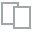
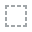
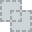
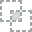
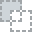
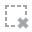
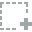
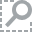
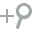
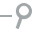
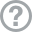
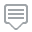
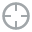
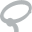
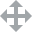
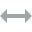
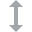
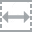
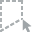
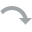
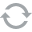
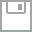
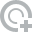
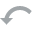
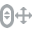
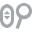
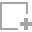
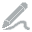
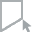
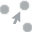
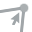
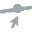

In [56]:
# Data statistics and visualizations
create_report(df)

### Detailed EDA


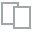
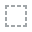
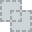
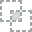
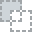
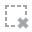
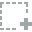
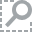
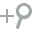
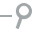
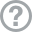
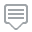
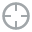
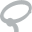
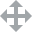
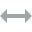
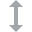
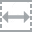
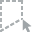
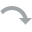
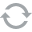
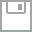
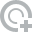
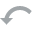
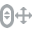
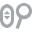
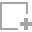
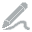
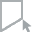
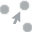
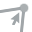
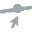

In [57]:
# correlation graphs
plot_correlation(df)

#### df.annual_inc


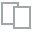
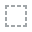
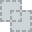
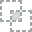
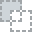
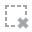
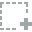
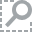
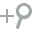
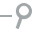
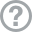
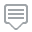
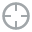
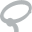
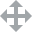
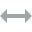
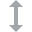
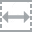
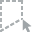
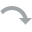
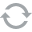
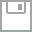
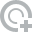
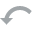
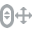
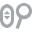
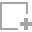
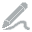
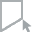
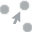
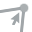
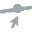

In [58]:
# From the stats and frequency chart, this may be better represented in categories. 
plot(df,'annual_inc')

In [86]:
income_bins = [0,30000,40000,50000,60000,70000,80000,100000,150000,6000001]
income_groups = ['under-30k','30-39k','40-49k','50-59k','60-69k','70-79k','80-100k','100-150000k','150000+']
df['income_level'] = pd.cut(df.annual_inc, bins=income_bins,labels=income_groups)

In [87]:
df['income_level'].value_counts()

40-49k         6279
50-59k         6095
30-39k         5599
under-30k      5092
80-100k        4992
60-69k         4480
100-150000k    4402
70-79k         3870
150000+        1723
Name: income_level, dtype: int64

In [89]:
df.income_level.isna().sum()

0

#### df.verification_status

In [69]:
df.verification_status.value_counts()

Not Verified       18757
Verified           13470
Source Verified    10305
Name: verification_status, dtype: int64

In [70]:
# verified values need to be combined
df.verification_status.replace('Source Verified','Verified',inplace=True)

In [71]:
df.verification_status.value_counts()

Verified        23775
Not Verified    18757
Name: verification_status, dtype: int64

#### Label Value df.loan_status


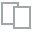
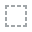
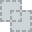
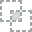
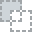
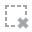
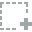
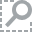
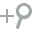
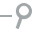
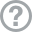
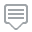
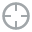
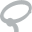
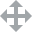
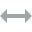
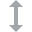
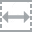
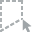
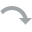
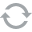
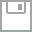
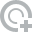
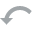
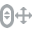
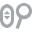
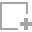
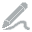
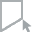
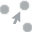
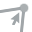
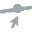

In [61]:
plot(df,'loan_status')

In [62]:
df.loan_status.value_counts()

Fully Paid                                             34114
Charged Off                                             5669
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [63]:
# This should be show as either Fully Paid or Charged Off
df.loan_status.replace('Does not meet the credit policy. Status:Fully Paid','Fully Paid',inplace=True)
df.loan_status.replace('Does not meet the credit policy. Status:Charged Off','Charged Off',inplace=True)
df.loan_status.value_counts()

Fully Paid     36102
Charged Off     6430
Name: loan_status, dtype: int64

In [64]:
df.loan_status = (df.loan_status == 'Fully Paid').astype(int)
df.loan_status.value_counts()

1    36102
0     6430
Name: loan_status, dtype: int64

In [65]:
df.loan_status.mean()

0.848819712216684

#### Final Review

In [90]:
df.describe()

annual_inc   loan_status           dti   delinq_2yrs  inq_last_6mths  \
count  4.253200e+04  42532.000000  42532.000000  42532.000000    42532.000000   
mean   6.913559e+04      0.848820     13.373312      0.152356        1.080739   
std    6.409517e+04      0.358229      6.726466      0.512264        1.527231   
min    1.896000e+03      0.000000      0.000000      0.000000        0.000000   
25%    4.000000e+04      1.000000      8.200000      0.000000        0.000000   
50%    5.900000e+04      1.000000     13.470000      0.000000        1.000000   
75%    8.250000e+04      1.000000     18.680000      0.000000        2.000000   
max    6.000000e+06      1.000000     29.990000     13.000000       33.000000   

       mths_since_last_delinq      open_acc       pub_rec     revol_bal  \
count            42532.000000  42532.000000  42532.000000  4.253200e+04   
mean                12.849408      9.343882      0.058097  1.429847e+04   
std                 21.661302      4.494860      0.245600  2.201907e+04   
min                  0.000000      1.000000      0.000000  0.000000e+00   
25%                  0.000000      6.000000      0.000000  3.636000e+03   
50%                  0.000000      9.000000      0.000000  8.821500e+03   
75%                 21.000000     12.000000      0.000000  1.725225e+04   
max                120.000000     47.000000      5.000000  1.207359e+06   

         revol_util     total_acc    recoveries  pub_rec_bankruptcies  
count  42532.000000  42532.000000  42532.000000          42532.000000  
mean      49.116994     22.123154    103.237687              0.043779  
std       28.333785     11.589290    737.195484              0.205522  
min        0.000000      1.000000      0.000000              0.000000  
25%       25.800000     13.000000      0.000000              0.000000  
50%       49.700000     20.000000      0.000000              0.000000  
75%       72.600000     29.000000      0.000000              0.000000  
max      119.000000     90.000000  29623.350000              2.000000

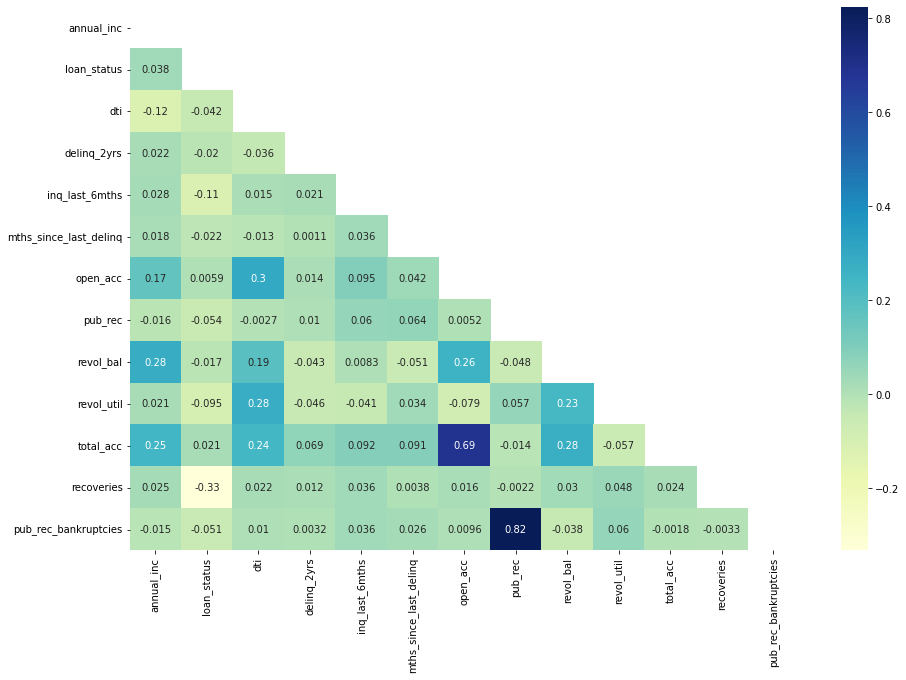

In [91]:
# Review of inter-feature correlation, consider action for highly correlated features.
plt.subplots(figsize=(15,10))

mask = np.triu(np.ones_like(df.corr())) # triangle mask to hide duplicates

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True, mask=mask)

In [92]:
for obj in df.columns[df.dtypes == 'O']:
    print(df[obj].value_counts())
    print('************************')

B    12389
A    10182
C     8740
D     6015
E     3394
F     1300
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1822
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1139
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     153
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
10+ years    9369
< 1 years    5061
2 years      4743
5 years      4569
3 years      4364
4 years      3649
1 years      3594
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64
************************
RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         144
Name: home_ownership, dtype: int64
************************
Verified        23775
Not Verified    18757
Na

In [93]:
df.isna().sum()

grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
recoveries                0
pub_rec_bankruptcies      0
income_level              0
dtype: int64

# Model

In [117]:
#@title Split: df_train / df_val

df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

In [97]:
#@title x_train

train_dict = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
x_train = dv.fit_transform(train_dict)

In [98]:
#@title x_val

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

In [99]:
#@title x_test

test_dict = df_test.to_dict(orient='records')
x_test = dv.transform(test_dict)

In [100]:
#@title def model_run(models)

def model_run(models):
  for name, model in models:
      model = model
      model.fit(x_train, y_train)
      
      print(" ")
      print("Model: ",name)
      print('Validation Accuracy: ', accuracy_score(y_val, model.predict(x_val)))
      print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
      print(" ")
      
      plt.figure()
      cf_matrix = confusion_matrix(y_val, model.predict(x_val))
      plt.title('Confusion Matrix: {}'.format(name))
      sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
      plt.show()
      
      print(" ")

      skplt.metrics.plot_roc(y_val, model.predict_proba(x_val))
      plt.title('ROC Curves: {}'.format(name))
      plt.show()

### Model Comparison

In [101]:
#@title Model Selection
models = [('Logistic Regression', LogisticRegression(max_iter=4000,random_state=10)), # max_iter=4000 to avoid convergence error
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=10)),
          ('Random Forest', RandomForestClassifier(random_state=10)),
          ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('Ada Boost', AdaBoostClassifier(random_state=1)),
          ('KNN', KNeighborsClassifier()),
          ('Support Vector Machine', SVC(probability=True, random_state=10)),
          ('XG Boost', XGBClassifier(random_state=10)),
          ('Cat Boost', CatBoostClassifier(logging_level='Silent')),
          ('Naive Bayes', ComplementNB())]

 
Model:  Logistic Regression
Validation Accuracy:  0.9942400376160809
Training Accuracy:  0.9950231209342425
 


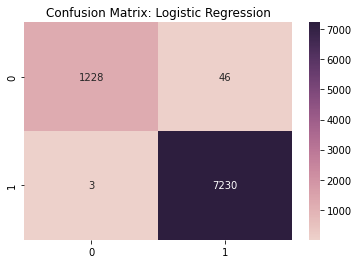

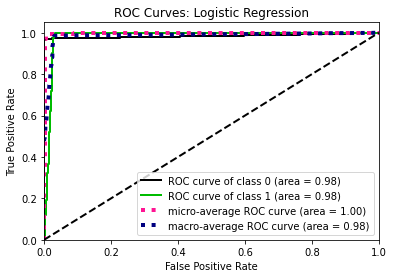

 
Model:  Decision Tree Classifier
Validation Accuracy:  0.9961208416598095
Training Accuracy:  1.0
 


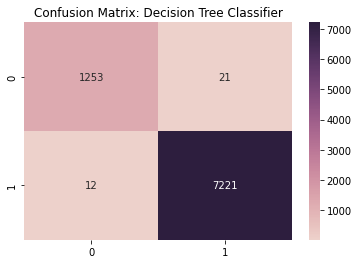

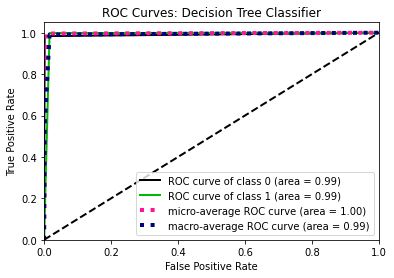

 
Model:  Random Forest
Validation Accuracy:  0.99729634418714
Training Accuracy:  1.0
 


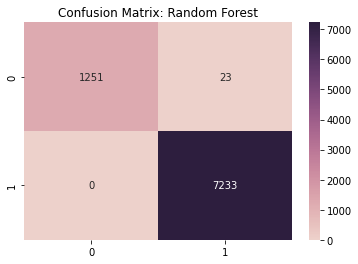

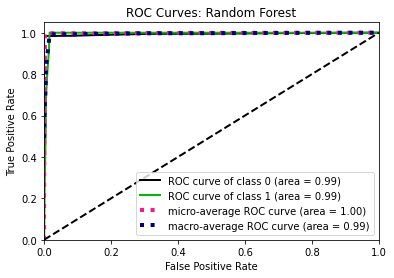

 
Model:  Linear Discriminant Analyzer
Validation Accuracy:  0.869871870224521
Training Accuracy:  0.8700916999764872
 


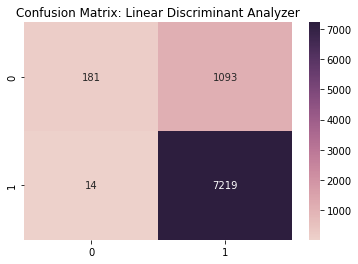

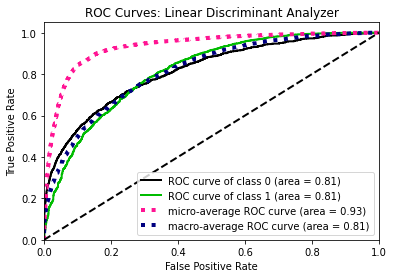

 
Model:  Ada Boost
Validation Accuracy:  0.997413894439873
Training Accuracy:  0.9985108550826868
 


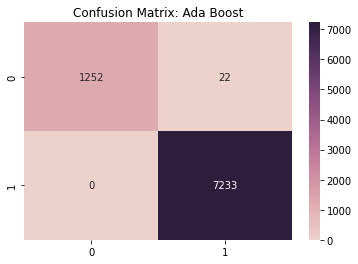

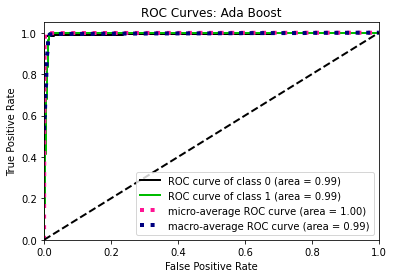

 
Model:  KNN


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


Validation Accuracy:  0.8662278123897966


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


Training Accuracy:  0.8834940042323066
 


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


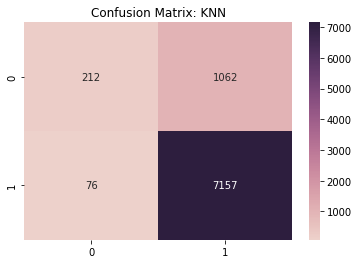

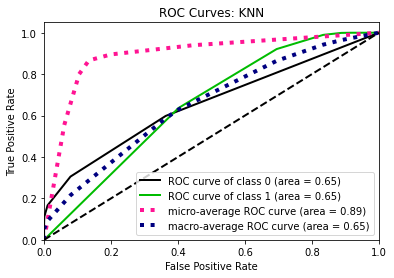

 
Model:  Support Vector Machine
Validation Accuracy:  0.8568237921711531
Training Accuracy:  0.8548867466102359
 


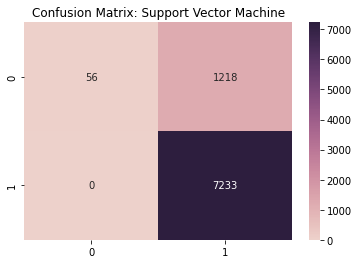

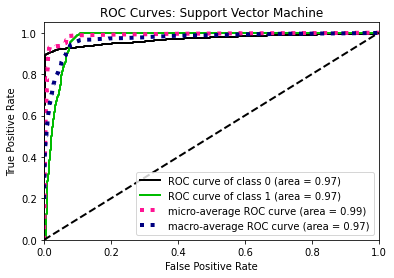

 
Model:  XG Boost
Validation Accuracy:  0.9975314446926061
Training Accuracy:  0.9986284191551063
 


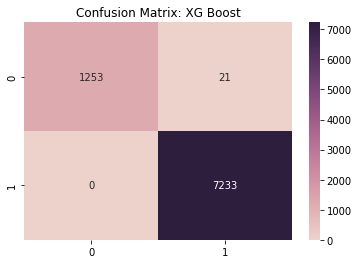

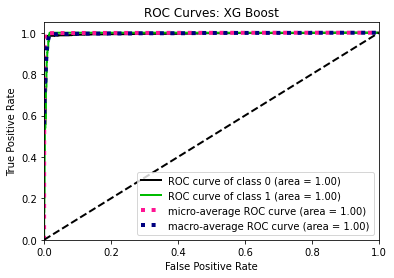

 
Model:  Cat Boost
Validation Accuracy:  0.9975314446926061
Training Accuracy:  0.9986676071792461
 


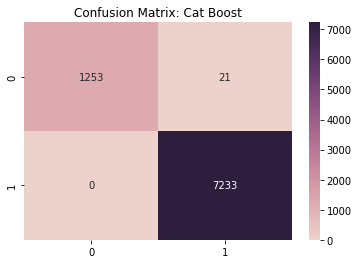

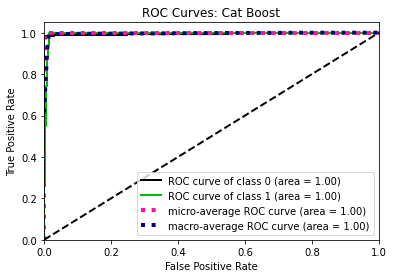

 
Model:  Naive Bayes
Validation Accuracy:  0.7658398965557776
Training Accuracy:  0.7705149306371972
 


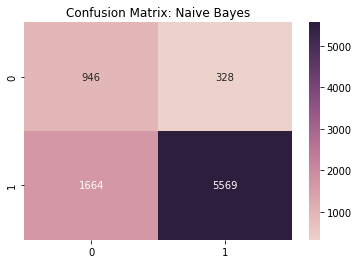

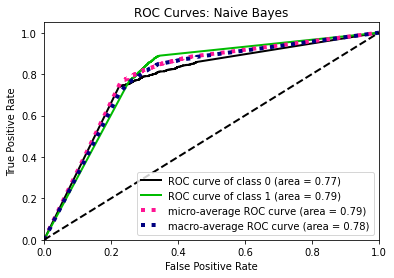

In [106]:
#@title Run all models
model_run(models)

## Possible Overfitting

In [112]:
#@title def test_model_run(models)

def test_model_run(models):
  for name, model in models:
      model = model
      model.fit(x_train, y_train)
      
      print(" ")
      print("Model: ",name)
      print('Test Accuracy: ', accuracy_score(y_test, model.predict(x_test)))
      print(" ")
      
      plt.figure()
      cf_matrix = confusion_matrix(y_test, model.predict(x_test))
      plt.title('Confusion Matrix: {}'.format(name))
      sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
      plt.show()
      
      print(" ")

      skplt.metrics.plot_roc(y_test, model.predict_proba(x_test))
      plt.title('ROC Curves: {}'.format(name))
      plt.show()

In [110]:
#@title Test Model Selection
test_models = [('Logistic Regression', LogisticRegression(max_iter=4000,random_state=10)),
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=10)),
          ('Random Forest', RandomForestClassifier(random_state=10)),
          ('Ada Boost', AdaBoostClassifier(random_state=1)),
          ('XG Boost', XGBClassifier(random_state=10)),
          ('Cat Boost', CatBoostClassifier(logging_level='Silent'))
          ]

 
Model:  Logistic Regression
Test Accuracy:  0.9942400376160809
 


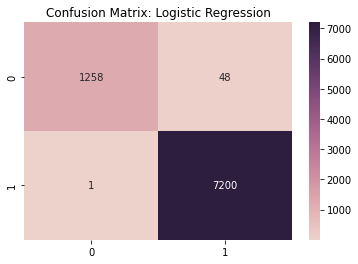

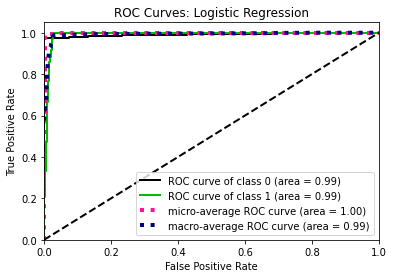

 
Model:  Decision Tree Classifier
Test Accuracy:  0.9964734924180086
 


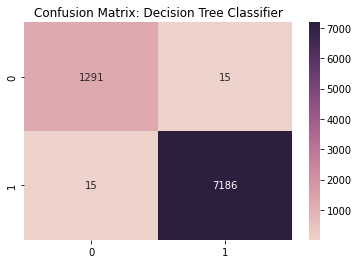

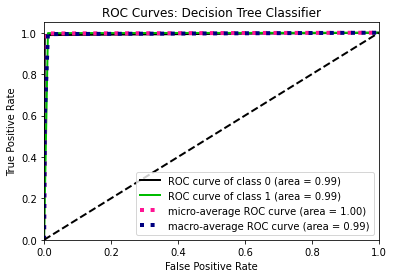

 
Model:  Random Forest
Test Accuracy:  0.9980016457035382
 


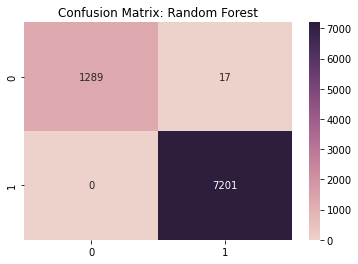

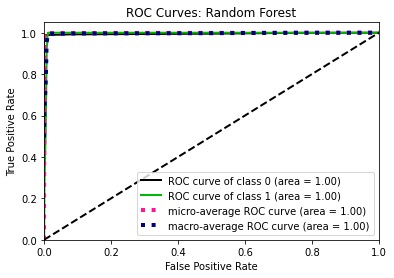

 
Model:  Ada Boost
Test Accuracy:  0.9976489949453391
 


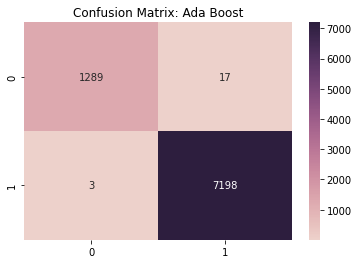

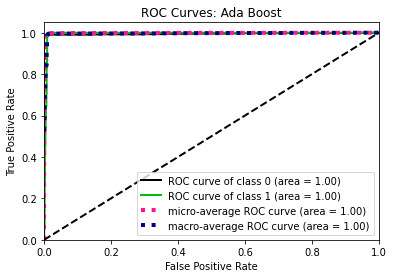

 
Model:  XG Boost
Test Accuracy:  0.9982367462090044
 


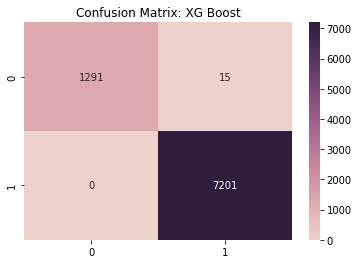

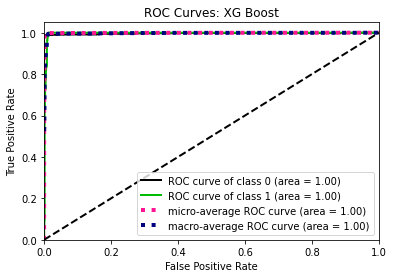

 
Model:  Cat Boost
Test Accuracy:  0.9982367462090044
 


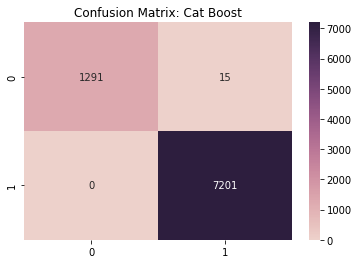

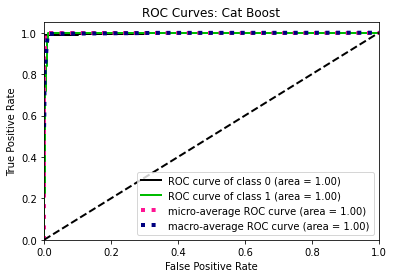

In [113]:
#@title test for overfitting models
test_model_run(test_models)

XG Boost and Cat Boost performed the best on validation data.

# Tuning

## XG Boost

XGBClassifier(random_state=10)

## Cat Boost

CatBoostClassifier(logging_level='Silent')

# Deployment